## Installing PySpark

In [1]:
# install java
# install apache spark with hadoop
# set environment variables
# !pip install pyspark

## Import Modules

In [2]:
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import os

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\nzen4


In [3]:
# initialize the session
spark = SparkSession.builder.appName('loan_prediction').getOrCreate()

## Load the Dataset

In [4]:
df = spark.read.csv('lending_dataset.csv', header=True, sep=',', inferSchema=True)
df.show()

+-----------+---------------+----+-------------------+-----------+-----+-------------------+------------------+-----------------+--------------+-------------+--------------+---------------------------+-------------------+---------------------+-------------+-----------------------+------------+
|loan_number|amount_borrowed|term|      borrower_rate|installment|grade|   origination_date|     listing_title|principal_balance|principal_paid|interest_paid|late_fees_paid|debt_sale_proceeds_received|  last_payment_date|next_payment_due_date|days_past_due|loan_status_description| data_source|
+-----------+---------------+----+-------------------+-----------+-----+-------------------+------------------+-----------------+--------------+-------------+--------------+---------------------------+-------------------+---------------------+-------------+-----------------------+------------+
|   10149342|        27050.0|  36|             0.1099|     885.46|    B|2013-12-01 00:00:00|debt_consolidation|    

In [5]:
# scan column
print(df.columns)

['loan_number', 'amount_borrowed', 'term', 'borrower_rate', 'installment', 'grade', 'origination_date', 'listing_title', 'principal_balance', 'principal_paid', 'interest_paid', 'late_fees_paid', 'debt_sale_proceeds_received', 'last_payment_date', 'next_payment_due_date', 'days_past_due', 'loan_status_description', 'data_source']


In [6]:

df_filtered = df.select('loan_number','amount_borrowed','installment','grade','listing_title','loan_status_description','data_source').show()

+-----------+---------------+-----------+-----+------------------+-----------------------+------------+
|loan_number|amount_borrowed|installment|grade|     listing_title|loan_status_description| data_source|
+-----------+---------------+-----------+-----+------------------+-----------------------+------------+
|   10149342|        27050.0|     885.46|    B|debt_consolidation|              COMPLETED|Lending Club|
|   10149488|         4800.0|     157.13|    B|  home_improvement|              COMPLETED|Lending Club|
|   10148122|        12000.0|     373.94|    A|debt_consolidation|              COMPLETED|Lending Club|
|   10119623|        12000.0|     398.52|    B|debt_consolidation|              COMPLETED|Lending Club|
|   10159498|        12000.0|     368.45|    A|debt_consolidation|              COMPLETED|Lending Club|
|   10119590|        11500.0|     323.54|    E|debt_consolidation|              COMPLETED|Lending Club|
|   10159548|        15000.0|      476.3|    A|debt_consolidatio

In [7]:
df.groupBy('data_source').count().show()

+------------+-------+
| data_source|  count|
+------------+-------+
|Lending Club|1961527|
|     Prosper| 913619|
+------------+-------+



In [8]:
total_rows = df.count()
formatted_total_rows = "{:,}".format(total_rows)  # Format angka dengan tanda koma
print('Total rows in dataset:', formatted_total_rows, 'rows')


Total rows in dataset: 2,875,146 rows


In [9]:
print(df.columns)

['loan_number', 'amount_borrowed', 'term', 'borrower_rate', 'installment', 'grade', 'origination_date', 'listing_title', 'principal_balance', 'principal_paid', 'interest_paid', 'late_fees_paid', 'debt_sale_proceeds_received', 'last_payment_date', 'next_payment_due_date', 'days_past_due', 'loan_status_description', 'data_source']


In [10]:
#Renaming column
df = df.withColumnRenamed("loan_status_description", "Loan_Status")
df.select('Loan_Status').show()

+-----------+
|Loan_Status|
+-----------+
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  COMPLETED|
|  CHARGEOFF|
|  CHARGEOFF|
|  COMPLETED|
+-----------+
only showing top 20 rows



In [11]:
df.groupBy('Loan_Status').count().show()

+-----------+-------+
|Loan_Status|  count|
+-----------+-------+
|  CHARGEOFF| 222867|
|  DEFAULTED|  95344|
|  COMPLETED|1173162|
|    CURRENT|1381520|
|  CANCELLED|   2253|
+-----------+-------+



In [74]:
import matplotlib.pyplot as plt

# Assuming you have a SparkSession named 'spark' and a DataFrame named 'df'
# Also, assuming 'listing_title' is the correct column name (you had a typo in 'listing_tittle')
df.groupBy('listing_title').count().show()

+------------------+-------+
|     listing_title|  count|
+------------------+-------+
|           wedding|   1850|
|             other| 124427|
|    small_business|  22834|
|debt_consolidation|1154304|
|       credit_card| 441191|
|            moving|  13336|
|          vacation|  13992|
|  renewable_energy|   1259|
|             house|  12099|
|               car|  21261|
|    major_purchase|  44442|
|           medical|  24808|
|  home_improvement| 136263|
|       educational|      2|
+------------------+-------+



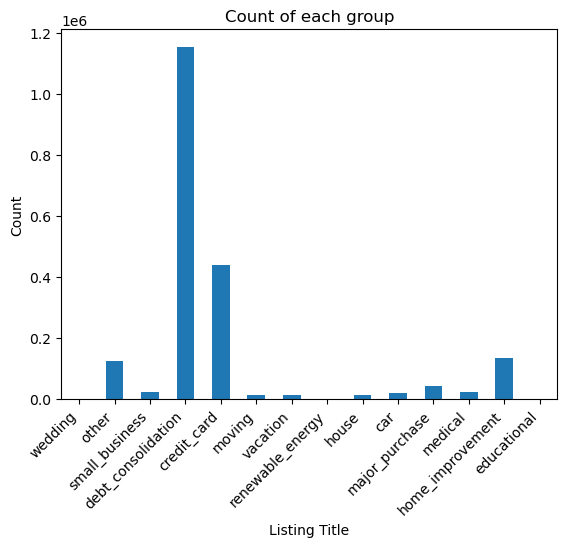

In [78]:
# Convert to Pandas DataFrame and plot the histogram
histogram_data = df.groupBy('listing_title').count().toPandas()
histogram_data.plot(kind='bar', x='listing_title', y='count', legend=False)
plt.title('Count of each group')
plt.xlabel('Listing Title')
plt.ylabel('Count')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  

plt.show()

In [12]:
data_pd = df.groupBy('Loan_Status').count().toPandas()
data_pd

,Loan_Status,count
0,CHARGEOFF,222867
1,DEFAULTED,95344
2,COMPLETED,1173162
3,CURRENT,1381520
4,CANCELLED,2253


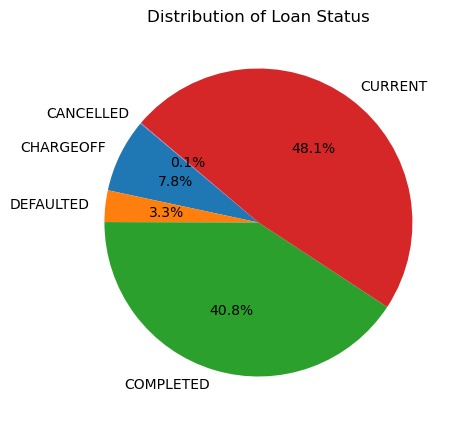

In [13]:
import matplotlib.pyplot as plt


labels = data_pd['Loan_Status']
sizes = data_pd['count']

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Status')
plt.show()


In [14]:
df.printSchema()

root
 |-- loan_number: integer (nullable = true)
 |-- amount_borrowed: double (nullable = true)
 |-- term: integer (nullable = true)
 |-- borrower_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- origination_date: timestamp (nullable = true)
 |-- listing_title: string (nullable = true)
 |-- principal_balance: double (nullable = true)
 |-- principal_paid: double (nullable = true)
 |-- interest_paid: double (nullable = true)
 |-- late_fees_paid: double (nullable = true)
 |-- debt_sale_proceeds_received: double (nullable = true)
 |-- last_payment_date: timestamp (nullable = true)
 |-- next_payment_due_date: timestamp (nullable = true)
 |-- days_past_due: integer (nullable = true)
 |-- Loan_Status: string (nullable = true)
 |-- data_source: string (nullable = true)



In [15]:
df.dtypes

[('loan_number', 'int'),
 ('amount_borrowed', 'double'),
 ('term', 'int'),
 ('borrower_rate', 'double'),
 ('installment', 'double'),
 ('grade', 'string'),
 ('origination_date', 'timestamp'),
 ('listing_title', 'string'),
 ('principal_balance', 'double'),
 ('principal_paid', 'double'),
 ('interest_paid', 'double'),
 ('late_fees_paid', 'double'),
 ('debt_sale_proceeds_received', 'double'),
 ('last_payment_date', 'timestamp'),
 ('next_payment_due_date', 'timestamp'),
 ('days_past_due', 'int'),
 ('Loan_Status', 'string'),
 ('data_source', 'string')]

## Data Analysis

In [16]:
#filter type data
string_columns = [col for col, dtype in df.dtypes if dtype == "string"]

print("column type string =", string_columns)

numeric_columns = [col for col, dtype in df.dtypes if dtype in ["int"]]

print("column type integer =",numeric_columns)


numeric_columns_ = [col for col, dtype in df.dtypes if dtype in ["double"]]

print("column double(float) =",numeric_columns_)


column type string = ['grade', 'listing_title', 'Loan_Status', 'data_source']
column type integer = ['loan_number', 'term', 'days_past_due']
column double(float) = ['amount_borrowed', 'borrower_rate', 'installment', 'principal_balance', 'principal_paid', 'interest_paid', 'late_fees_paid', 'debt_sale_proceeds_received']


In [17]:
# display count based on grade using pyspark code
df.groupBy('grade').count().show()
# display count based on listing title using pyspark code
df.groupBy('listing_title').count().show()
# display count based on loan status using pyspark code
df.groupBy('Loan_Status').count().show()
# display count based on data source using pyspark code
df.groupBy('data_source').count().show()

+-----+------+
|grade| count|
+-----+------+
|    F|109319|
|    E|241131|
|    B|748503|
|    D|518479|
|    C|787525|
|    A|433303|
|    G| 36886|
+-----+------+

+------------------+-------+
|     listing_title|  count|
+------------------+-------+
|           wedding|   1850|
|             other| 124427|
|    small_business|  22834|
|debt_consolidation|1154304|
|       credit_card| 441191|
|            moving|  13336|
|          vacation|  13992|
|  renewable_energy|   1259|
|             house|  12099|
|               car|  21261|
|    major_purchase|  44442|
|           medical|  24808|
|  home_improvement| 136263|
|       educational|      2|
|              NULL| 863078|
+------------------+-------+

+-----------+-------+
|Loan_Status|  count|
+-----------+-------+
|  CHARGEOFF| 222867|
|  DEFAULTED|  95344|
|  COMPLETED|1173162|
|    CURRENT|1381520|
|  CANCELLED|   2253|
+-----------+-------+

+------------+-------+
| data_source|  count|
+------------+-------+
|Lending Club|

In [18]:
df.describe()

DataFrame[summary: string, loan_number: string, amount_borrowed: string, term: string, borrower_rate: string, installment: string, grade: string, listing_title: string, principal_balance: string, principal_paid: string, interest_paid: string, late_fees_paid: string, debt_sale_proceeds_received: string, days_past_due: string, Loan_Status: string, data_source: string]

In [19]:
# display count based on loan status using pyspark code
df.groupBy('Loan_Status').count().show()

+-----------+-------+
|Loan_Status|  count|
+-----------+-------+
|  CHARGEOFF| 222867|
|  DEFAULTED|  95344|
|  COMPLETED|1173162|
|    CURRENT|1381520|
|  CANCELLED|   2253|
+-----------+-------+



In [20]:
import pyspark.sql.functions as F
df.select("amount_borrowed", "grade").groupBy('grade').agg(F.avg('amount_borrowed')).show()
df.select("amount_borrowed", "listing_title").groupBy('listing_title').agg(F.avg('amount_borrowed')).show()
df.select("amount_borrowed", "listing_title").groupBy('listing_title').agg(F.sum('amount_borrowed')).show()


+-----+--------------------+
|grade|avg(amount_borrowed)|
+-----+--------------------+
|    F|  12207.119023408557|
|    E|    15259.8158974997|
|    B|  14045.184046864206|
|    D|  15028.245432910493|
|    C|  14908.438397866732|
|    A|  14254.627182179676|
|    G|   10157.66890395543|
+-----+--------------------+

+------------------+--------------------+
|     listing_title|avg(amount_borrowed)|
+------------------+--------------------+
|           wedding|  11608.097297297298|
|             other|  10579.387600761893|
|    small_business|  16261.971178943679|
|debt_consolidation|  15780.150069860281|
|       credit_card|  15300.927942773085|
|            moving|   8338.394196160767|
|          vacation|    6637.56153516295|
|  renewable_energy|  10873.351072279587|
|             house|  15767.086122820068|
|               car|    9665.96865810639|
|    major_purchase|   12858.66810674587|
|           medical|     9674.5504675911|
|  home_improvement|  14654.003139957289|
|       

In [21]:
df.printSchema()

root
 |-- loan_number: integer (nullable = true)
 |-- amount_borrowed: double (nullable = true)
 |-- term: integer (nullable = true)
 |-- borrower_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- origination_date: timestamp (nullable = true)
 |-- listing_title: string (nullable = true)
 |-- principal_balance: double (nullable = true)
 |-- principal_paid: double (nullable = true)
 |-- interest_paid: double (nullable = true)
 |-- late_fees_paid: double (nullable = true)
 |-- debt_sale_proceeds_received: double (nullable = true)
 |-- last_payment_date: timestamp (nullable = true)
 |-- next_payment_due_date: timestamp (nullable = true)
 |-- days_past_due: integer (nullable = true)
 |-- Loan_Status: string (nullable = true)
 |-- data_source: string (nullable = true)



## Perform SQL Operations

In [22]:
import pyspark.sql as sparksql

In [23]:
df.createOrReplaceTempView('lending_dataset')

In [24]:
# display top rows from the table
spark.sql("select loan_number,amount_borrowed,installment,grade,listing_title,Loan_Status,data_source from lending_dataset limit 5").show()

+-----------+---------------+-----------+-----+------------------+-----------+------------+
|loan_number|amount_borrowed|installment|grade|     listing_title|Loan_Status| data_source|
+-----------+---------------+-----------+-----+------------------+-----------+------------+
|   10149342|        27050.0|     885.46|    B|debt_consolidation|  COMPLETED|Lending Club|
|   10149488|         4800.0|     157.13|    B|  home_improvement|  COMPLETED|Lending Club|
|   10148122|        12000.0|     373.94|    A|debt_consolidation|  COMPLETED|Lending Club|
|   10119623|        12000.0|     398.52|    B|debt_consolidation|  COMPLETED|Lending Club|
|   10159498|        12000.0|     368.45|    A|debt_consolidation|  COMPLETED|Lending Club|
+-----------+---------------+-----------+-----+------------------+-----------+------------+



In [25]:
'''/*The average percentage of outstanding balance for each loan status, where the outstanding 
balance percentage is defined as the principal balance divided by the amount borrowed rank
by average*/'''


spark.sql("""
SELECT Loan_Status,
       ROUND(AVG(principal_balance / amount_borrowed), 3) AS percentage_outstanding_balance,
       RANK() OVER (ORDER BY AVG(principal_balance / amount_borrowed) DESC) AS rank
FROM lending_dataset
GROUP BY Loan_Status
ORDER BY percentage_outstanding_balance DESC;
""").show()

+-----------+------------------------------+----+
|Loan_Status|percentage_outstanding_balance|rank|
+-----------+------------------------------+----+
|    CURRENT|                         0.659|   1|
|  DEFAULTED|                         0.081|   2|
|  CHARGEOFF|                         0.062|   3|
|  COMPLETED|                           0.0|   4|
|  CANCELLED|                           0.0|   4|
+-----------+------------------------------+----+



In [26]:
'''For loan status 'defaulted', order the grades based on the highest to lowest 
average percentage of outstanding balance. Additionally, display the number of loans and 
the average borrower rate (interest rate) for each loan.'''

spark.sql("""
select Loan_Status,
AVG(principal_balance/amount_borrowed) as percentage_out_standing_balance,
COUNT(loan_number)amount_borrowed, AVG(amount_borrowed)avg_anount_borrowed,
AVG(borrower_rate)avg_borrower_rate
from lending_dataset
where Loan_Status = 'COMPLETED'
group by Loan_Status
order by percentage_out_standing_balance desc
""").show()

+-----------+-------------------------------+---------------+-------------------+-------------------+
|Loan_Status|percentage_out_standing_balance|amount_borrowed|avg_anount_borrowed|  avg_borrower_rate|
+-----------+-------------------------------+---------------+-------------------+-------------------+
|  COMPLETED|                            0.0|        1173162| 13799.386691965818|0.13359203554151536|
+-----------+-------------------------------+---------------+-------------------+-------------------+



In [27]:
# total pinjaman yang telah diberikan ke setiap nasabah berdasarkan tahun di kolom origination_date
#
spark.sql("""
Select distinct listing_title,
SUM(amount_borrowed)jumlah_pinjaman,EXTRACT(YEAR FROM origination_date)years
from lending_dataset
group by years,listing_title
order by years asc

""").show()

+------------------+---------------+-----+
|     listing_title|jumlah_pinjaman|years|
+------------------+---------------+-----+
|           wedding|      8267925.0| 2012|
|          vacation|      2122500.0| 2012|
|           medical|      5541900.0| 2012|
|    small_business|    2.2547075E7| 2012|
|  home_improvement|    3.8147675E7| 2012|
|  renewable_energy|       766025.0| 2012|
|               car|      6704750.0| 2012|
|       credit_card|   1.35442375E8| 2012|
|debt_consolidation|   4.44852375E8| 2012|
|    major_purchase|    1.2726875E7| 2012|
|             other|     3.075945E7| 2012|
|            moving|      3093600.0| 2012|
|             house|      6970100.0| 2012|
|    major_purchase|     2.454945E7| 2013|
|             house|    1.0947625E7| 2013|
|          vacation|      3293525.0| 2013|
|  renewable_energy|       539950.0| 2013|
|    small_business|    2.1505575E7| 2013|
|  home_improvement|   1.04904725E8| 2013|
|            moving|      4963775.0| 2013|
+----------

In [28]:
# total pinjaman yang telah diberikan ke setiap nasabah berdasarkan tahun di kolom origination_date dan hanya dengan listing yang 
# memiliki kata home
spark.sql("""
Select distinct listing_title,
SUM(amount_borrowed)jumlah_pinjaman,EXTRACT(YEAR FROM origination_date)years
from lending_dataset
where listing_title ilike '%home%'
group by years,listing_title
order by years asc

""").show()

+----------------+---------------+-----+
|   listing_title|jumlah_pinjaman|years|
+----------------+---------------+-----+
|home_improvement|    3.8147675E7| 2012|
|home_improvement|   1.04904725E8| 2013|
|home_improvement|   1.89687575E8| 2014|
|home_improvement|   3.73108025E8| 2015|
|home_improvement| 4.5224639686E8| 2016|
|home_improvement|   5.42830606E8| 2017|
|home_improvement|   2.95873427E8| 2018|
+----------------+---------------+-----+



In [29]:
#in pyspark 
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, year
from pyspark.sql.types import StringType  # Add this import if needed
from pyspark.sql.functions import sum, substring

result = (df
          .filter(df['listing_title'].like('%home%'))
          .groupBy(substring('origination_date', 1, 4).alias('years'), 'listing_title')
          .agg(sum('amount_borrowed').alias('jumlah_pinjaman'))
          .orderBy('years'))

# Show the result
result.show()

+-----+----------------+---------------+
|years|   listing_title|jumlah_pinjaman|
+-----+----------------+---------------+
| 2012|home_improvement|    3.8147675E7|
| 2013|home_improvement|   1.04904725E8|
| 2014|home_improvement|   1.89687575E8|
| 2015|home_improvement|   3.73108025E8|
| 2016|home_improvement| 4.5224639686E8|
| 2017|home_improvement|   5.42830606E8|
| 2018|home_improvement|   2.95873427E8|
+-----+----------------+---------------+



In [30]:
#Total loans provided to customers with a purpose related to homes, which 
#can be found from listing_title containing the word "home"

spark.sql("""
Select listing_title,
SUM(amount_borrowed)total_loans
from lending_dataset
where listing_title ilike '%home%'
group by listing_title
""").show()
    

+----------------+--------------------+
|   listing_title|         total_loans|
+----------------+--------------------+
|home_improvement|1.9967984298600001E9|
+----------------+--------------------+



In [31]:
""""

spark.sql("""

# you may enter query sql here

""").show()
"""

').show()\n'

## Data Cleaning pyspark

In [32]:
null_counts = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+-----------+---------------+----+-------------+-----------+-----+----------------+-------------+-----------------+--------------+-------------+--------------+---------------------------+-----------------+---------------------+-------------+-----------+-----------+
|loan_number|amount_borrowed|term|borrower_rate|installment|grade|origination_date|listing_title|principal_balance|principal_paid|interest_paid|late_fees_paid|debt_sale_proceeds_received|last_payment_date|next_payment_due_date|days_past_due|Loan_Status|data_source|
+-----------+---------------+----+-------------+-----------+-----+----------------+-------------+-----------------+--------------+-------------+--------------+---------------------------+-----------------+---------------------+-------------+-----------+-----------+
|          0|              0|   0|            0|          0|    0|               0|       863078|                0|             0|            0|             0|                          0|               

In [33]:
df = df.dropna()

In [34]:
#cek 
null_counts = df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+-----------+---------------+----+-------------+-----------+-----+----------------+-------------+-----------------+--------------+-------------+--------------+---------------------------+-----------------+---------------------+-------------+-----------+-----------+
|loan_number|amount_borrowed|term|borrower_rate|installment|grade|origination_date|listing_title|principal_balance|principal_paid|interest_paid|late_fees_paid|debt_sale_proceeds_received|last_payment_date|next_payment_due_date|days_past_due|Loan_Status|data_source|
+-----------+---------------+----+-------------+-----------+-----+----------------+-------------+-----------------+--------------+-------------+--------------+---------------------------+-----------------+---------------------+-------------+-----------+-----------+
|          0|              0|   0|            0|          0|    0|               0|            0|                0|             0|            0|             0|                          0|               

In [35]:
# get mean value of column 
mean = df.select(F.avg(df['amount_borrowed'])).collect()[0][0]
mean

14958.341076265811

In [36]:
# get mode value of column
mode_gender = df.groupby('listing_title').count().orderBy("count", ascending=False).first()[0]
mode_gender

'debt_consolidation'

In [37]:
# fill null values for all the columns
numerical_cols = ['loan_number', 'amount_borrowed', 'term', 'borrower_rate', 'installment', 'principal_balance', 'principal_paid', 'interest_paid', 'late_fees_paid', 'debt_sale_proceeds_received', 'days_past_due']
categorical_cols = ['grade', 'listing_title', 'Loan_Status', 'data_source']

In [38]:
all_columns = df.columns

# Apply StringIndexer to string columns
for column in all_columns:
    if df.schema[column].dataType == "string":
        string_indexer = StringIndexer(inputCol=column, outputCol="encoded_" + column)
        df = string_indexer.fit(df).transform(df)

# Show the transformed DataFrame
df.show()

+-----------+---------------+----+-------------------+-----------+-----+-------------------+------------------+-----------------+--------------+-------------+--------------+---------------------------+-------------------+---------------------+-------------+-----------+------------+
|loan_number|amount_borrowed|term|      borrower_rate|installment|grade|   origination_date|     listing_title|principal_balance|principal_paid|interest_paid|late_fees_paid|debt_sale_proceeds_received|  last_payment_date|next_payment_due_date|days_past_due|Loan_Status| data_source|
+-----------+---------------+----+-------------------+-----------+-----+-------------------+------------------+-----------------+--------------+-------------+--------------+---------------------------+-------------------+---------------------+-------------+-----------+------------+
|   10149342|        27050.0|  36|             0.1099|     885.46|    B|2013-12-01 00:00:00|debt_consolidation|              0.0|       27050.0|      4

In [39]:
for col in numerical_cols:
    mean = df.select(F.mean(df[col])).collect()[0][0]
    df = df.na.fill(mean, [col])

In [40]:
for col in categorical_cols:
    mode = df.groupby(col).count().orderBy("count", ascending=False).first()[0]
    df = df.na.fill(mode, [col])

In [41]:
# display null values
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----------+---------------+----+-------------+-----------+-----+----------------+-------------+-----------------+--------------+-------------+--------------+---------------------------+-----------------+---------------------+-------------+-----------+-----------+
|loan_number|amount_borrowed|term|borrower_rate|installment|grade|origination_date|listing_title|principal_balance|principal_paid|interest_paid|late_fees_paid|debt_sale_proceeds_received|last_payment_date|next_payment_due_date|days_past_due|Loan_Status|data_source|
+-----------+---------------+----+-------------+-----------+-----+----------------+-------------+-----------------+--------------+-------------+--------------+---------------------------+-----------------+---------------------+-------------+-----------+-----------+
|          0|              0|   0|            0|          0|    0|               0|            0|                0|             0|            0|             0|                          0|               

In [42]:
df.groupBy('Loan_Status').count().show()

+-----------+-------+
|Loan_Status|  count|
+-----------+-------+
|  CHARGEOFF| 203856|
|  DEFAULTED|   2758|
|  COMPLETED| 797399|
|    CURRENT|1007859|
|  CANCELLED|    196|
+-----------+-------+



In [43]:
# how to find and replace values
df = df.withColumn('Loan_Status', F.when(df['Loan_Status']=='COMPLETED', 1).otherwise(0))
df.show(5)

+-----------+---------------+----+-------------+-----------+-----+-------------------+------------------+-----------------+--------------+-------------+--------------+---------------------------+-------------------+---------------------+-------------+-----------+------------+
|loan_number|amount_borrowed|term|borrower_rate|installment|grade|   origination_date|     listing_title|principal_balance|principal_paid|interest_paid|late_fees_paid|debt_sale_proceeds_received|  last_payment_date|next_payment_due_date|days_past_due|Loan_Status| data_source|
+-----------+---------------+----+-------------+-----------+-----+-------------------+------------------+-----------------+--------------+-------------+--------------+---------------------------+-------------------+---------------------+-------------+-----------+------------+
|   10149342|        27050.0|  36|       0.1099|     885.46|    B|2013-12-01 00:00:00|debt_consolidation|              0.0|       27050.0|      4702.53|           0.0|  

## Feature Engineering

In [44]:
df.printSchema()

root
 |-- loan_number: integer (nullable = true)
 |-- amount_borrowed: double (nullable = false)
 |-- term: integer (nullable = true)
 |-- borrower_rate: double (nullable = false)
 |-- installment: double (nullable = false)
 |-- grade: string (nullable = false)
 |-- origination_date: timestamp (nullable = true)
 |-- listing_title: string (nullable = false)
 |-- principal_balance: double (nullable = false)
 |-- principal_paid: double (nullable = false)
 |-- interest_paid: double (nullable = false)
 |-- late_fees_paid: double (nullable = false)
 |-- debt_sale_proceeds_received: double (nullable = false)
 |-- last_payment_date: timestamp (nullable = true)
 |-- next_payment_due_date: timestamp (nullable = true)
 |-- days_past_due: integer (nullable = true)
 |-- Loan_Status: integer (nullable = false)
 |-- data_source: string (nullable = false)



In [45]:
#filter type
string_columns = [col for col, dtype in df.dtypes if dtype == "string"]

print(string_columns)


['grade', 'listing_title', 'data_source']


In [46]:
#filter type
numeric_columns = [col for col, dtype in df.dtypes if dtype in ["int"]]

print(numeric_columns)


['loan_number', 'term', 'days_past_due', 'Loan_Status']


In [47]:
#filter type
numeric_columns = [col for col, dtype in df.dtypes if dtype in ["double","int"]]

print(numeric_columns)


['loan_number', 'amount_borrowed', 'term', 'borrower_rate', 'installment', 'principal_balance', 'principal_paid', 'interest_paid', 'late_fees_paid', 'debt_sale_proceeds_received', 'days_past_due', 'Loan_Status']


In [48]:
from pyspark.ml.feature import VectorAssembler, OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline

In [49]:
categorical_columns = ['grade', 'listing_title', 'Loan_Status', 'data_source']
numerical_columns = ['amount_borrowed', 'borrower_rate', 'late_fees_paid', 'debt_sale_proceeds_received']

# index the string columns
indexers = [StringIndexer(inputCol=col, outputCol="{0}_index".format(col)) for col in categorical_columns]

# encode the indexed values
encoders = [OneHotEncoder(dropLast=False, inputCol=indexer.getOutputCol(), outputCol="{0}_encoded".format(indexer.getOutputCol()))
           for indexer in indexers]

input_columns = [encoder.getOutputCol() for encoder in encoders] + numerical_columns

# vectorize the encoded values
assembler = VectorAssembler(inputCols=input_columns, outputCol="feature")

In [50]:
# create the pipeline to transform the data
pipeline = Pipeline(stages = indexers + encoders + [assembler])

In [51]:
data_model = pipeline.fit(df)

In [52]:
transformed_df = data_model.transform(df)

In [53]:
transformed_df.show(1)

+-----------+---------------+----+-------------+-----------+-----+-------------------+------------------+-----------------+--------------+-------------+--------------+---------------------------+-------------------+---------------------+-------------+-----------+------------+-----------+-------------------+-----------------+-----------------+-------------------+---------------------------+-------------------------+-------------------------+--------------------+
|loan_number|amount_borrowed|term|borrower_rate|installment|grade|   origination_date|     listing_title|principal_balance|principal_paid|interest_paid|late_fees_paid|debt_sale_proceeds_received|  last_payment_date|next_payment_due_date|days_past_due|Loan_Status| data_source|grade_index|listing_title_index|Loan_Status_index|data_source_index|grade_index_encoded|listing_title_index_encoded|Loan_Status_index_encoded|data_source_index_encoded|             feature|
+-----------+---------------+----+-------------+-----------+-----+--

In [54]:

# split the data for train and test
train_data, test_data = transformed_df.randomSplit([0.8, 0.2], seed=42)

In [55]:
train_data.show(5)

+-----------+---------------+----+-------------+-----------+-----+-------------------+------------------+-----------------+--------------+-------------+--------------+---------------------------+-------------------+---------------------+-------------+-----------+------------+-----------+-------------------+-----------------+-----------------+-------------------+---------------------------+-------------------------+-------------------------+--------------------+
|loan_number|amount_borrowed|term|borrower_rate|installment|grade|   origination_date|     listing_title|principal_balance|principal_paid|interest_paid|late_fees_paid|debt_sale_proceeds_received|  last_payment_date|next_payment_due_date|days_past_due|Loan_Status| data_source|grade_index|listing_title_index|Loan_Status_index|data_source_index|grade_index_encoded|listing_title_index_encoded|Loan_Status_index_encoded|data_source_index_encoded|             feature|
+-----------+---------------+----+-------------+-----------+-----+--

Preprocessing the data
Training and testing sets are ready now. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data.

Now, let's try to understand what these scaled values mean in the real world. Let's use CreditScore as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a CreditScore of 1 is the highest since we're rescaling all the values to the range of 0-1.

# Fitting a logistic regression model to the train set
Essentially, predicting if a credit card application will be approved or not is a classification task. According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved.

This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.

Which model should we pick? Because of this correlation between the features, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).

In [56]:
feature_names = df.select('loan_number','amount_borrowed','installment','grade','listing_title','Loan_status','data_source')

In [57]:
feature_names.show()

+-----------+---------------+-----------+-----+------------------+-----------+------------+
|loan_number|amount_borrowed|installment|grade|     listing_title|Loan_status| data_source|
+-----------+---------------+-----------+-----+------------------+-----------+------------+
|   10149342|        27050.0|     885.46|    B|debt_consolidation|          1|Lending Club|
|   10149488|         4800.0|     157.13|    B|  home_improvement|          1|Lending Club|
|   10148122|        12000.0|     373.94|    A|debt_consolidation|          1|Lending Club|
|   10119623|        12000.0|     398.52|    B|debt_consolidation|          1|Lending Club|
|   10159498|        12000.0|     368.45|    A|debt_consolidation|          1|Lending Club|
|   10119590|        11500.0|     323.54|    E|debt_consolidation|          1|Lending Club|
|   10159548|        15000.0|      476.3|    A|debt_consolidation|          1|Lending Club|
|   10127816|        24000.0|      814.8|    B|       credit_card|          1|Le

In [58]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.feature import StandardScaler
from pyspark.sql import SparkSession

# Create or retrieve SparkSession

# Selecting specific columns
selected_columns = ['loan_number', 'amount_borrowed', 'installment', 'grade', 'listing_title', 'Loan_status', 'data_source']
selected_df = df.select(selected_columns)

# Define StringIndexers for string columns
string_indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in ['grade', 'listing_title', 'data_source']]

# Apply StringIndexers
indexed_df = selected_df
for indexer in string_indexers:
    indexed_df = indexer.fit(indexed_df).transform(indexed_df)

# Selecting indexed columns along with numeric columns
numeric_columns = ['loan_number', 'amount_borrowed', 'installment', 'Loan_status']
assembler_inputs = [col+"_index" for col in ['grade', 'listing_title', 'data_source']] + numeric_columns
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
assembled_df = assembler.transform(indexed_df)

# Apply StandardScaler to the assembled features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

# Select the scaled features and original columns
result_df = scaled_df.select("loan_number", "amount_borrowed", "installment", "grade", "listing_title", "data_source", "Loan_status", "scaled_features")

# Show the resulting DataFrame
result_df.show()


+-----------+---------------+-----------+-----+------------------+------------+-----------+--------------------+
|loan_number|amount_borrowed|installment|grade|     listing_title| data_source|Loan_status|     scaled_features|
+-----------+---------------+-----------+-----+------------------+------------+-----------+--------------------+
|   10149342|        27050.0|     885.46|    B|debt_consolidation|Lending Club|          1|[0.72356614867946...|
|   10149488|         4800.0|     157.13|    B|  home_improvement|Lending Club|          1|[0.72356614867946...|
|   10148122|        12000.0|     373.94|    A|debt_consolidation|Lending Club|          1|[1.44713229735892...|
|   10119623|        12000.0|     398.52|    B|debt_consolidation|Lending Club|          1|[0.72356614867946...|
|   10159498|        12000.0|     368.45|    A|debt_consolidation|Lending Club|          1|[1.44713229735892...|
|   10119590|        11500.0|     323.54|    E|debt_consolidation|Lending Club|          1|[2.89

## Model Training & Testing

In [59]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [60]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.sql import SparkSession


# Selecting specific columns
selected_columns = ['loan_number', 'amount_borrowed', 'installment', 'grade', 'listing_title', 'Loan_status', 'data_source']
selected_df = df.select(selected_columns)

# Define StringIndexers for string columns
string_indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in ['grade', 'listing_title', 'data_source']]

# Apply StringIndexers
indexed_df = selected_df
for indexer in string_indexers:
    indexed_df = indexer.fit(indexed_df).transform(indexed_df)

# Selecting indexed columns along with numeric columns
numeric_columns = ['loan_number', 'amount_borrowed', 'installment', 'Loan_status']
assembler_inputs = [col+"_index" for col in ['grade', 'listing_title', 'data_source']] + numeric_columns
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
assembled_df = assembler.transform(indexed_df)

# Apply StandardScaler to the assembled features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

# Select the scaled features and original columns
result_df = scaled_df.select("loan_number", "amount_borrowed", "installment", "grade", "listing_title", "data_source", "Loan_status", "scaled_features")

# Show the resulting DataFrame
result_df.show()

# Creating logistic regression model
lr = LogisticRegression(featuresCol='scaled_features', labelCol='Loan_status')
lr_model = lr.fit(result_df)


+-----------+---------------+-----------+-----+------------------+------------+-----------+--------------------+
|loan_number|amount_borrowed|installment|grade|     listing_title| data_source|Loan_status|     scaled_features|
+-----------+---------------+-----------+-----+------------------+------------+-----------+--------------------+
|   10149342|        27050.0|     885.46|    B|debt_consolidation|Lending Club|          1|[0.72356614867946...|
|   10149488|         4800.0|     157.13|    B|  home_improvement|Lending Club|          1|[0.72356614867946...|
|   10148122|        12000.0|     373.94|    A|debt_consolidation|Lending Club|          1|[1.44713229735892...|
|   10119623|        12000.0|     398.52|    B|debt_consolidation|Lending Club|          1|[0.72356614867946...|
|   10159498|        12000.0|     368.45|    A|debt_consolidation|Lending Club|          1|[1.44713229735892...|
|   10119590|        11500.0|     323.54|    E|debt_consolidation|Lending Club|          1|[2.89

In [61]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# creating model logistic regression
lr = LogisticRegression(featuresCol='feature', labelCol='Loan_Status')
lr_model = lr.fit(train_data)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn import metrics
# predict on test data
predictions = lr_model.transform(test_data)
predictions.show(5)

+-----------+---------------+----+-------------+-----------+-----+-------------------+------------------+-----------------+--------------+-------------+--------------+---------------------------+-------------------+---------------------+-------------+-----------+------------+-----------+-------------------+-----------------+-----------------+-------------------+---------------------------+-------------------------+-------------------------+--------------------+--------------------+--------------------+----------+
|loan_number|amount_borrowed|term|borrower_rate|installment|grade|   origination_date|     listing_title|principal_balance|principal_paid|interest_paid|late_fees_paid|debt_sale_proceeds_received|  last_payment_date|next_payment_due_date|days_past_due|Loan_Status| data_source|grade_index|listing_title_index|Loan_Status_index|data_source_index|grade_index_encoded|listing_title_index_encoded|Loan_Status_index_encoded|data_source_index_encoded|             feature|       rawPredic

In [63]:
from sklearn.metrics import roc_curve, auc
auc = BinaryClassificationEvaluator().setLabelCol('Loan_Status')
print('Area Under the Curve (AUC) from kurva ROC (AUC):', str(auc.evaluate(predictions)))

Area Under the Curve (AUC) from kurva ROC (AUC): 0.9999998957303451


# Random Forest

In [64]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import roc_curve, auc


rf = RandomForestClassifier(featuresCol='feature', labelCol='Loan_Status')
rf_model = rf.fit(train_data)


# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Display the first 5 rows of predictions
predictions.show(5)

# Evaluate the model and print the AUC value
auc_evaluator = BinaryClassificationEvaluator().setLabelCol('Loan_Status')
auc_value = auc_evaluator.evaluate(predictions)
print('Area Under the Curve (AUC):', auc_value)

+-----------+---------------+----+-------------+-----------+-----+-------------------+------------------+-----------------+--------------+-------------+--------------+---------------------------+-------------------+---------------------+-------------+-----------+------------+-----------+-------------------+-----------------+-----------------+-------------------+---------------------------+-------------------------+-------------------------+--------------------+--------------------+--------------------+----------+
|loan_number|amount_borrowed|term|borrower_rate|installment|grade|   origination_date|     listing_title|principal_balance|principal_paid|interest_paid|late_fees_paid|debt_sale_proceeds_received|  last_payment_date|next_payment_due_date|days_past_due|Loan_Status| data_source|grade_index|listing_title_index|Loan_Status_index|data_source_index|grade_index_encoded|listing_title_index_encoded|Loan_Status_index_encoded|data_source_index_encoded|             feature|       rawPredic

In [65]:
# Convert Spark DataFrame to Pandas DataFrame
predictions_pd = predictions.select('Loan_Status', 'prediction').toPandas()

In [66]:
# Extract labels and predictions from Pandas DataFrame
labels = predictions_pd['Loan_Status']
predictions = predictions_pd['prediction']

In [67]:
predictions_pd.value_counts()

Loan_Status  prediction
0            0.0           243066
1            1.0           159404
dtype: int64

In [68]:
predictions_pd

,Loan_Status,prediction
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
402465,0,0.0
402466,0,0.0
402467,0,0.0
402468,0,0.0


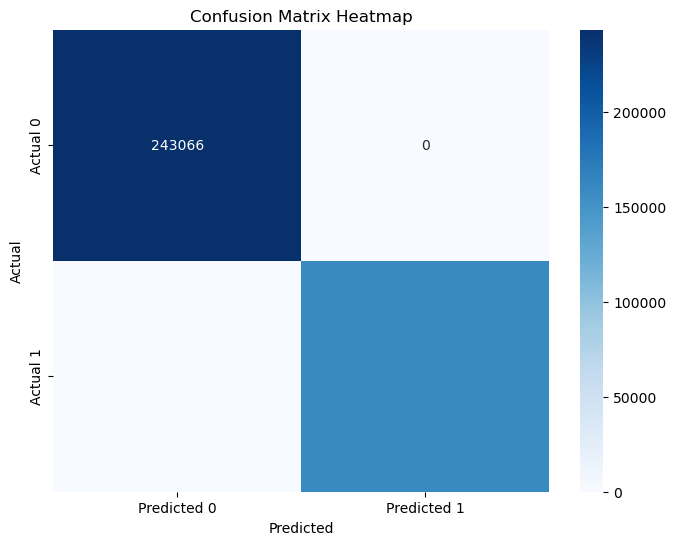

In [69]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)



# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()